# TP1 - Classification des images médicales

<br>

Le but de ce TP est d'implementer et comparer les performances de deux algorithmes d'apprentisssage automatique sur une base de données publique qui contient des images sur la maladie de cancer de la peau.
Les deux alogorithmes sont : la machine à vecteurs de support (SVM) et la régression logistique (LR). Rappelons que les algorithmes SVM et la LR font partie de l'apprentissage supervisé.

Nous allons travailler sur le  __[Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)__ et l'utilisation de quelques fonctionalités de la bibliothèque Python __[scikit-learn](http://scikit-learn.org)__ et de sa __[documentation](https://scikit-learn.org/stable/user_guide.html)__. 

Nous utiliserons également la librairie classique "numpy"  pour les calculs scientifiques et la librairie "matplotlib" pour afficher les résultats.


<br>



# 1. Télèchargement de la base de données

L'ensemble de données qui sera utilisé dans ce TP est fourni par l'Institut National de Santé. Pour une rapidité de calcul, nous allons utiliser seulement une version plus petite de ce jeu de données téléchargeables sur le site web suivant : __https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign__

Après télèchargement de la base de données, vous trouverez le dossier "data" qui contient les sous-dossiers suivants: 
1. Train : dossier qui contient 2637 images d'apprentissage (1440 images pour la classe "Benign" et 1197 images pour la classe "Malignant").
2. Test : dossier qui contient 660 images de test (environ 360 images pour la classe "Benign" et 300 images pour la classe "Malignant").

Il est à noter que toutes les images de la base sont standarisées à la taille 224*224 pixels. Donc, il n'est pas nécessaire d'ajouter une étape de redimentionnement des images par la suite.

# 2. Travail à réaliser

# 2.1. les librairies utiles

Tout d'abord, on fait l'importation des librairies utiles

In [3]:
# importation des librairies Python utiles:
import os # librairie qui permet de créer ou supprimer un répertoire (dossier) et récupérer son contenu 
import cv2 #  librairie opencv qui permet la manupilation des images
import numpy as np # librairie qui permet de créer et manipuler des matrices
import seaborn as sns # librairie pour la visualisation des données
import matplotlib.pyplot as plt # plot des images

# 2.2. Prétraitement de la base données

On commence par organiser les données d'apprentissage

In [4]:
train_images = [] # images dans le dossier "train"
train_labels = [] # étiquettes des données de "train"

for directory_path, _, filenames in os.walk('./train'): # accées aux images d'apprentissage
    label = directory_path.split("/")[-1]
    print(label)
    for filename in filenames:
        img_path = os.path.join(directory_path, filename)
        # print(img_path)
        
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        train_images.append(img) # "append" pour l'ajout des éléments dans une liste
        train_labels.append(label)
        
train_images = np.array(train_images) # convertir les images à un tableau numpy pour faciliter leur manuipulation
train_labels = np.array(train_labels)

train
malignant
benign


__Question 1__ : vérifiez la taille de la base d'apprentissage en utilisant la fonction `len`

In [5]:
len(train_labels)

2637

On passe maintenant aux données de test

In [6]:
test_images = [] # images dans le dossier "test"
test_labels = [] # étiquettes des données de "test"

for directory_path, _, filenames in os.walk('./test'): # accées aux images d'apprentissage
    label = directory_path.split("/")[-1]
    print(label)
    for filename in filenames:
        img_path = os.path.join(directory_path, filename)
        # print(img_path)
        
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        test_images.append(img) # ajout des éléments dans une liste
        test_labels.append(label)
        
test_images = np.array(test_images) # convertir les images à un tableau numpy pour faciliter leur manuipulation
test_labels = np.array(test_labels)

test
malignant
benign


__Question 2__ : vérifiez la taille de la base de test par l'utilisation de la fonction `len`

In [7]:
len(test_images)

660

# 2.3. Visualisation des images

Le but de cette partie est de se familiariser à la manipulation des images

__Question 3__ : faites des plots pour quelques images d'apprentissage et de test pour la classe "Benign" et pour la classe "Malignant" en utilisant la librairie `Matplotlib`

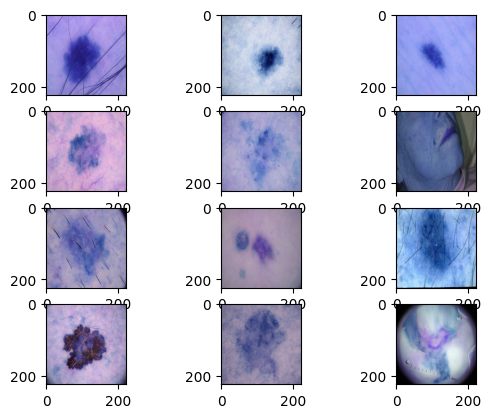

In [8]:
i=1

test_be = test_images[359:]
test_mal = test_images[:359]

train_be = train_images[122:]
train_mal = train_images[:122]

for i in range(3):
    plt.subplot(4,3,i+1)
    plt.imshow(test_be[i])
for i in range(3):
    plt.subplot(4,3,i+4)
    plt.imshow(test_mal[i])
    
for i in range(3):
    plt.subplot(4,3,i+7)
    plt.imshow(train_be[i])
for i in range(3):
    plt.subplot(4,3,i+10)
    plt.imshow(train_mal[i])

__Question 4__ : vérifiez la taille des images affichées en utilisant la fonction `Shape`

In [9]:
np.shape(test_images[0])

(224, 224, 3)

# 2.4. Transformation des étiquettes au format entier

Nous allons à présent modifier les étiquettes de la base fournie à des format entier (0 et 1) au lieu de ("Benign" et "Malignant")

Pour ce faire, vous pouvez essayer la librairie `preprocessing.LabelEncoder()` de `sklearn` __https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html___

In [14]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["benign","malignant"])

new_label_test = le.transform(test_labels)
new_label_train = le.transform(train_labels)


__Question 5__ : affichez les nouvelles étiquettes trouvées pour la base d'apprentissage ainsi que pour la base de test

In [15]:
print("test:",new_label_test)
print("train:",new_label_train)


test: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

# 2.5. Préparation des données pour la classification

__Question 6__ : Organisez la base de données avec les nouvelles étiquettes trouvées en notant comme suit :

x_train : les données d'apprentissage

y_train : les nouvelles étiquelles trouvées pour les données d'apprentissage

x_test  : les données de test

y_test  : les nouvelles étiquelles trouvées pour les données de test

In [16]:
x_train = train_images
y_train = new_label_train

x_test = test_images
y_test = new_label_test

__Question 7__ : normaliser entre 0 et 1 la base de données (x_train et x_test) pour une rapidité de calcul

In [17]:
x_test = x_test/255
x_train = x_train/255


# 2.6. Création des modèles

Nous allons à présent créer des modèles permettant de classifier les images en deux classes (classifiation binaire): 

Soit la classe '0' pour "Benign"

Soit la classe '1' pour "Malignant"

# 2.6.1. Modèle SVM

__Rappel__ : la machine à vecteurs de support (SVM) est un algorithme d'apprentissage supervisé (voir la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))

Pour créer un modèle SVM, il faut tout d'abord importer la librairie `sklearn`

_NB_ : pensez à laisser les paramètres définis par défaut par `sklearn` du modèle SVM

In [18]:
from sklearn.svm import SVC

svm_model = SVC()

Une fois le modèle est bien défini, passez maintenant à l'étape d'apprentissage en utilisant la librairie `fit`

In [19]:
# erreur car x train n'a pas la bonne taille
# svm_model.fit(x_train,y_train)

Vérifiez si l'étape d'apprentissage est bien finie...si non comment peut-on résoudre le problème survenu?

In [20]:
x_train = x_train.reshape(len(x_train),3*224*224)
x_test = x_test.reshape(len(x_test),3*224*224)

In [ ]:
svm_model.fit(x_train,y_train)

Après l'apprentissage du modèle, on passe à la phase de test en utilisant la librairie `prediction`

In [ ]:
ypredicted = svm_model.predict(x_test)

Après la phase de test, évaluez la performance du modèle SVM par le calcul de quelques métriques comme la précision

_NB_ : vous pouvez utiliser la librairie `metrics` en `sklearn`


In [ ]:
from sklearn import metrics

accuracy_score = metrics.accuracy_score(y_test,ypredicted)
accuracy_score

Commentez le résultat trouvé

c'est super 👍 comme score

Pensez à tester autres métriques en utilisant `classification_report` en `sklearn` __https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html__

In [19]:
metrics.classification_report(y_test,ypredicted)

'              precision    recall  f1-score   support\n\n           0       0.87      0.82      0.84       360\n           1       0.80      0.85      0.82       300\n\n    accuracy                           0.83       660\n   macro avg       0.83      0.83      0.83       660\nweighted avg       0.84      0.83      0.83       660\n'

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       360
           1       0.80      0.85      0.82       300

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.84      0.83      0.83       660

Commentez le résultat trouvé

on a une meilleur précision sur les bénignes que sur les malignes

Tracer une matrice de confusion en utilisant `ConfusionMatrixDisplay` en `sklearn.metrics` __https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html__

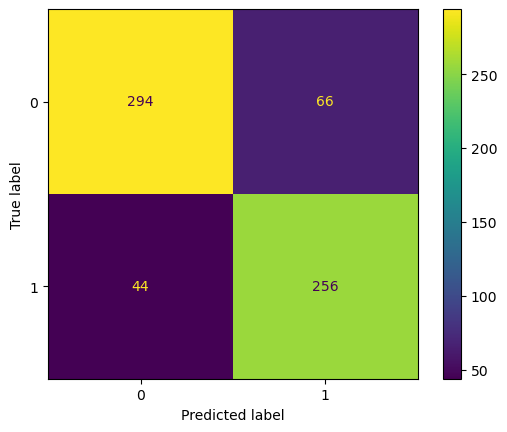

In [22]:
cm = metrics.confusion_matrix(y_test,ypredicted)

disp = metrics.ConfusionMatrixDisplay(cm)

disp.plot()

# 2.6.2. Modèle de régression logistique

__Rappel__ : la régression logistique est un modèle statistique utilisé souvent pour la classification et l'analyse prédictive  (voir la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

Pour créer un modèle de regression logistique, il suffit d'importer `LogisticRegression` en `sklearn` __https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html__ et définir le modèle

_NB_ : pensez à laisser les paramètres définis par défaut par `sklearn` du modèle régression logistique

In [37]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=100000)

Une fois le modèle est bien défini, passez maintenant à l'étape d'apprentissage en utilisant la librairie `fit`

In [38]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=100000)

Après l'apprentissage du modèle, on passe à la phase de test en utilisant la librairie `prediction`

In [39]:
ypredicted = logisticRegr.predict(x_test)

Refaire les mêmes étapes réalisées pour le modèle SVM, pour évaluer les performances du modèle de régression logistique (le calcul des métriques et la matrice de confusion...)

In [40]:
metrics.classification_report(y_test,ypredicted)

'              precision    recall  f1-score   support\n\n           0       0.79      0.83      0.81       360\n           1       0.78      0.73      0.76       300\n\n    accuracy                           0.79       660\n   macro avg       0.79      0.78      0.78       660\nweighted avg       0.79      0.79      0.79       660\n'

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       360
           1       0.78      0.73      0.76       300

    accuracy                           0.79       660
   macro avg       0.79      0.78      0.78       660
weighted avg       0.79      0.79      0.79       660


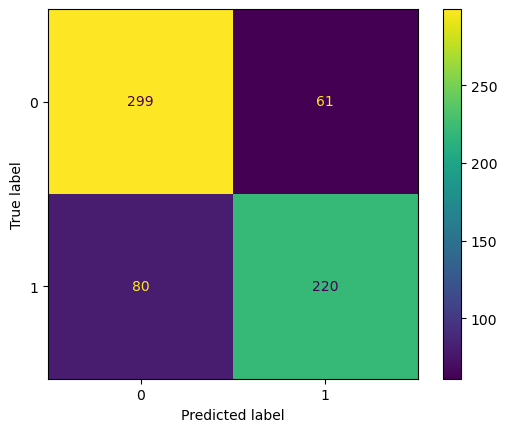

In [41]:
cm = metrics.confusion_matrix(y_test,ypredicted)

disp = metrics.ConfusionMatrixDisplay(cm)

disp.plot()

# 2.6.3. Comparaison

Faites une comparaison entre les deux modèles appris (SVM et régression logistique) d'après les résultats obtenus...